Case Study - Reseach Group

Topic - Customer Segmentation

**Vidhi Vazirani**

MBA Tech CE - 4th Year

## Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# reading the dataset
df = pd.read_csv('Orders - Analysis Task.csv')

## Data Preprocessing


### Data Exploration

In [ ]:
# seeing the first 5 rows
df.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [ ]:
# shape of dataset
df.shape

(70052, 17)

In [ ]:
# column names
df.columns

Index(['product_title', 'product_type', 'variant_title', 'variant_sku',
       'variant_id', 'customer_id', 'order_id', 'day', 'net_quantity',
       'gross_sales', 'discounts', 'returns', 'net_sales', 'taxes',
       'total_sales', 'returned_item_quantity', 'ordered_item_quantity'],
      dtype='object')

In [ ]:
# information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

***As observed from the information given above, no feature has any null values or missing values.***



In [ ]:
# 5 point summary of each column
df.describe()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442320e+11,6.013091e+11,5.506075e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.255079e+12,6.223201e+12,2.587640e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000657e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270317e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522207e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736876e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.422212e+13,9.977409e+13,9.999554e+13,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000


### Data cleaning
***The minimum net quantity is a negative number, which is not acceptable. Thus that needs to be explored and corrected.***

In [ ]:
# number of rows with negative net quantity
df[df['net_quantity']<0].count(1).shape

(10715,)

***Around 10k rows have a negative net quantity. Since we cannot do anything about such cases, it is best to drop these rows. We will do the same by removing those products whose ordered_item_quantity is 0, ie, no units of that item have been sold.***

In [ ]:
df = df[df['ordered_item_quantity']>0]
df.shape

(59337, 17)

### Feature Reduction
To simplify the  model and not overfit it, all features will not be used. Only 3 fetures will be used:
1. Products ordered per customer
2. Average return rate
3. Total spending

***Calculating the number of products ordered by each customer based on the customer id and product type***

In [ ]:
def binary(column):
  if column > 0:
    return 1
  else:
    return 0

In [ ]:
def number_of_orders_per_customer(df, columns):
  df1 = (df.groupby(columns).ordered_item_quantity.count().reset_index())
  # print(df1.head())

  df1['products_order'] = (df1.ordered_item_quantity.apply(binary))
  # print(df1.head())

  final_df = (df1.groupby(columns[0]).products_order.sum().reset_index())

  return final_df

In [ ]:
customers = number_of_orders_per_customer(df, ['customer_id', 'product_type'])
customers.head()

,customer_id,products_order
0,1000661,1
1,1001914,1
2,1002167,3
3,1002387,1
4,1002419,2


In [ ]:
customers.shape

(24874, 2)

***Making a dataset that shows the average return rate of per customer's per product***

In [ ]:
# making a dataframe for quantity ordered
df_ordered = (df.groupby(['customer_id','order_id']).ordered_item_quantity.sum().reset_index())
df_ordered

,customer_id,order_id,ordered_item_quantity
0,1000661,99119989117212,3
1,1001914,79758569034715,1
2,1002167,38156088848638,1
3,1002167,57440147820257,1
4,1002167,58825523953710,1
...,...,...,...
42131,98854671633650,57138827010765,1
42132,98974226154136,45066842874543,1
42133,99262726332691,88173870014223,2
42134,99262726332691,99798633226297,1


In [ ]:
# making a dataframe for quantity returned 
df_returned = (df.groupby(['customer_id','order_id']).returned_item_quantity.sum().reset_index())
df_returned.head()

,customer_id,order_id,returned_item_quantity
0,1000661,99119989117212,0
1,1001914,79758569034715,0
2,1002167,38156088848638,0
3,1002167,57440147820257,0
4,1002167,58825523953710,0


In [ ]:
# merging ordered and returned quantites' datasets
df_order_return = pd.merge(df_ordered, df_returned)
df_order_return.head()

,customer_id,order_id,ordered_item_quantity,returned_item_quantity
0,1000661,99119989117212,3,0
1,1001914,79758569034715,1,0
2,1002167,38156088848638,1,0
3,1002167,57440147820257,1,0
4,1002167,58825523953710,1,0


In [ ]:
df_order_return.shape

(42136, 4)

In [ ]:
# calculating return rate 
df_order_return['avg_return_rate'] = (-1*df_order_return['returned_item_quantity']/df_order_return['ordered_item_quantity'])
df_order_return.head()
df_order_return.shape

(42136, 5)

In [ ]:
# grouping return rate for each customer
customer_return_rate = (df_order_return.groupby("customer_id").avg_return_rate.mean().reset_index())
customer_return_rate

,customer_id,avg_return_rate
0,1000661,0.0
1,1001914,0.0
2,1002167,0.0
3,1002387,0.0
4,1002419,0.0
...,...,...
24869,97805007741979,0.0
24870,98854671633650,0.0
24871,98974226154136,0.0
24872,99262726332691,0.0


In [ ]:
# making a new dataframe for recording return rate
return_rates = pd.DataFrame(customer_return_rate["avg_return_rate"].value_counts().reset_index())
return_rates.head()

,index,avg_return_rate
0,0.000000,24823
1,0.333333,13
2,1.000000,13
3,0.500000,9
4,0.250000,5


In [ ]:
return_rates.shape

(13, 2)

In [ ]:
return_rates.rename(columns=
                    {"index": "average return rate",
                     "avg_return_rate": "count of unit return rate"},
                    inplace=True)
return_rates

,average return rate,count of unit return rate
0,0.000000,24823
1,0.333333,13
2,1.000000,13
3,0.500000,9
4,0.250000,5
5,0.166667,2
6,0.200000,2
7,0.666667,2
8,0.083333,1
9,0.013889,1


In [ ]:
return_rates.sort_values(by="average return rate")

,average return rate,count of unit return rate
0,0.000000,24823
9,0.013889,1
10,0.066667,1
8,0.083333,1
12,0.125000,1
5,0.166667,2
6,0.200000,2
4,0.250000,5
1,0.333333,13
11,0.400000,1


In [ ]:
# adding avg return rate column to main dataframe
df_customers = pd.merge(customers, customer_return_rate, on='customer_id')

In [ ]:
df_customers.shape

(24874, 3)

In [ ]:
df_customers.head()

,customer_id,products_order,avg_return_rate
0,1000661,1,0.0
1,1001914,1,0.0
2,1002167,3,0.0
3,1002387,1,0.0
4,1002419,2,0.0


***Calculating how much one customer is spending in total on all orders***

In [ ]:
# adding total sales of each order after grouping by customer id
df_spend = (df.groupby('customer_id').total_sales.sum().reset_index())
df_spend.head()

,customer_id,total_sales
0,1000661,260.0
1,1001914,79.2
2,1002167,234.2
3,1002387,89.0
4,1002419,103.0


Now we have three main features ready:
1. Order quantity
2. Average Return rate
3. Total expenditure 

All these features are for all unique customers in the data base. 

Thus we can now make the final database that will be used for the KMeans Clustering. 

In [ ]:
customers_final = df_order_return.merge(df_spend, on='customer_id')
customers_final.head()

,customer_id,order_id,ordered_item_quantity,returned_item_quantity,avg_return_rate,total_sales
0,1000661,99119989117212,3,0,0.0,260.0
1,1001914,79758569034715,1,0,0.0,79.2
2,1002167,38156088848638,1,0,0.0,234.2
3,1002167,57440147820257,1,0,0.0,234.2
4,1002167,58825523953710,1,0,0.0,234.2


Here, we dont need the following columns:
1. customer ID
2. Order ID
3. Returned item quantity

Thus we can drop these columns. 

In [ ]:
customers_final.drop(columns=['customer_id','order_id','returned_item_quantity'], inplace=True)

In [ ]:
#customers_final.head()
customers_final.shape

(42136, 3)

### Normalization
***Normalizing and scaling the values in all columns.***

For this, the log1p funtion from numpy is used. this function returns the log(1+x) value. 

In [ ]:
customers_final['scaled_products_ordered'] = np.log1p(customers_final['ordered_item_quantity'])
customers_final['scaled_return_rate'] = np.log1p(customers_final['avg_return_rate'])
customers_final['scaled_spending'] = np.log1p(customers_final['total_sales'])
customers_final.head()


,ordered_item_quantity,avg_return_rate,total_sales,scaled_products_ordered,scaled_return_rate,scaled_spending
0,3,0.0,260.0,1.386294,0.0,5.564520
1,1,0.0,79.2,0.693147,0.0,4.384524
2,1,0.0,234.2,0.693147,0.0,5.460436
3,1,0.0,234.2,0.693147,0.0,5.460436
4,1,0.0,234.2,0.693147,0.0,5.460436


In [ ]:
# dropping unscaled columns

customers_final.drop(columns=['ordered_item_quantity','avg_return_rate','total_sales'], inplace=True)

In [ ]:
customers_final.head()

,scaled_products_ordered,scaled_return_rate,scaled_spending
0,1.386294,0.0,5.564520
1,0.693147,0.0,4.384524
2,0.693147,0.0,5.460436
3,0.693147,0.0,5.460436
4,0.693147,0.0,5.460436


In [ ]:
customers_final.shape

(42136, 3)

## KMeans Clustering

Now that the dataframe is preprcoessed and ready, it can be applied to the model. 



In [ ]:
# kmeans
from sklearn.cluster import KMeans

In [ ]:
kmeans_model = KMeans(init='k-means++', max_iter=500, random_state=42)

kmeans_model.fit(customers_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
print("within-cluster sum-of-squares (inertia) of the model is:", kmeans_model.inertia_)

within-cluster sum-of-squares (inertia) of the model is: 2760.596099060223


### Selecting optimal K value
***An elbow curve graph can be plotted for analysing the optimal k value.***

In [ ]:
def optimal_k(k_values,df):
  dist = dict()
  for k in k_values:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=500, random_state=42)
    model.fit(df)
    dist[k]=model.inertia_
  return dist

dist = optimal_k ([2,3,4,5,6,7,8,9,10,11,12,13,14,15],customers_final)
dist

{2: 11880.839060468295,
 3: 7164.880651876598,
 4: 5497.546001240112,
 5: 4519.651798452988,
 6: 3860.9782795057017,
 7: 3252.4585881166067,
 8: 2760.596099060223,
 9: 2340.580880225185,
 10: 1988.0042934241826,
 11: 1745.452593024219,
 12: 1537.7176460796004,
 13: 1401.1323905227434,
 14: 1282.9472932510478,
 15: 1167.1164053592752}

Text(0, 0.5, 'Within cluster distance')

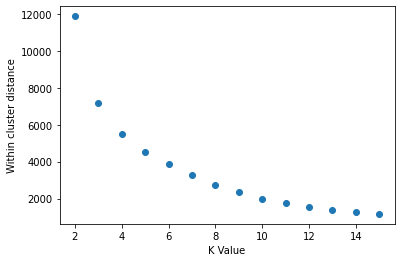

In [ ]:
plt.scatter(list(dist.keys()),list(dist.values()))
plt.xlabel('K Value')
plt.ylabel('Within cluster distance')

In [ ]:
updated_kmeans_model = KMeans(n_clusters = 4, init='k-means++', max_iter=500, random_state=42)

clusters = updated_kmeans_model.fit_predict(customers_final)

In [ ]:
len(clusters)

42136

In [ ]:
print(clusters[0:10])

[1 3 0 0 0 3 3 1 3 0]


In [ ]:
print('Distance within clusters =', np.round(updated_kmeans_model.inertia_,2))

Distance within clusters = 5497.55


### Visualization

Text(0.5, 0, 'Total Spending')

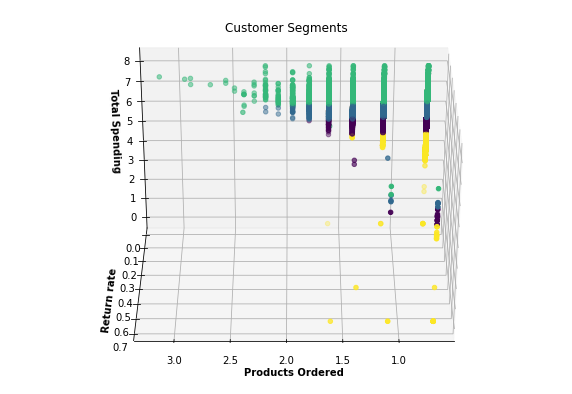

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.view_init(30,-270)
ax.scatter3D(customers_final['scaled_products_ordered'], customers_final['scaled_return_rate'], customers_final['scaled_spending'],c=clusters)
plt.title('Customer Segments')
ax.set_xlabel('Products Ordered', fontweight ='bold')
ax.set_ylabel('Return rate', fontweight ='bold')
ax.set_zlabel('Total Spending', fontweight ='bold')


In [ ]:
# bar plot to understand the distribution of customers in each cluster
points_in_each_cluster = [0,0,0,0]
for c in clusters:
  if c == 0:
    points_in_each_cluster[0]+=1
  elif c == 1:
    points_in_each_cluster[1]+=1
  elif c == 2:
    points_in_each_cluster[2]+=1
  else:
    points_in_each_cluster[3]+=1

print('Number of points in cluster 0 =',points_in_each_cluster[0])
print('Number of points in cluster 1 =',points_in_each_cluster[1])
print('Number of points in cluster 2 =',points_in_each_cluster[2])
print('Number of points in cluster 3 =',points_in_each_cluster[3])

Number of points in cluster 0 = 12677
Number of points in cluster 1 = 12318
Number of points in cluster 2 = 6388
Number of points in cluster 3 = 10753


<BarContainer object of 4 artists>

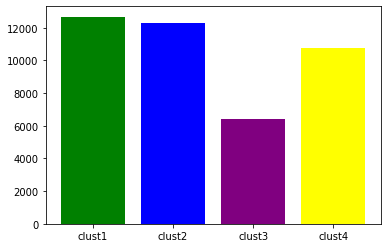

In [ ]:
clust = ['clust1','clust2','clust3','clust4']
plt.bar(clust,points_in_each_cluster, color=['green','blue','purple','yellow'])

In [ ]:
customers_final

,scaled_products_ordered,scaled_return_rate,scaled_spending
0,1.386294,0.0,5.564520
1,0.693147,0.0,4.384524
2,0.693147,0.0,5.460436
3,0.693147,0.0,5.460436
4,0.693147,0.0,5.460436
...,...,...,...
42131,0.693147,0.0,5.495117
42132,0.693147,0.0,4.499810
42133,1.098612,0.0,5.590987
42134,0.693147,0.0,5.590987


In [ ]:
# adding the cluster values in the dataframe
customers_final['cluster_number'] = clusters

In [ ]:
customers_final

,scaled_products_ordered,scaled_return_rate,scaled_spending,cluster_number
0,1.386294,0.0,5.564520,1
1,0.693147,0.0,4.384524,3
2,0.693147,0.0,5.460436,0
3,0.693147,0.0,5.460436,0
4,0.693147,0.0,5.460436,0
...,...,...,...,...
42131,0.693147,0.0,5.495117,1
42132,0.693147,0.0,4.499810,3
42133,1.098612,0.0,5.590987,1
42134,0.693147,0.0,5.590987,1
